In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Data transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])
# Load dataset
dataset = torchvision.datasets.MNIST(root="./data", train = True, transform = transform, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle= True)

In [ ]:
# Define the generator
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(100,256),
        nn.ReLU(),
        nn.Linear(256,512),
        nn.ReLU(),
        nn.Linear(512,1024),
        nn.ReLU(),
        nn.Linear(1024,784),
        nn.Tanh(),
    )

  def forward(self,z):
    return self.model(z).view(-1,1,28,28)

In [ ]:
# Define the discriminator
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(784,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,1),
        nn.Sigmoid()
    )

  def forward(self,x):
    return self.model(x.view(-1,784))

In [ ]:

generator = Generator()
discriminator = Discriminator()

# Binary Cross-Entropy loss for GANs
criterion = nn.BCELoss()

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

In [ ]:
num_epochs = 10  # Set more epochs for better results

for epoch in range(num_epochs):
    for real_images, _ in dataloader:
        batch_size = real_images.size(0)

        # Create labels
        real_labels = torch.ones(batch_size, 1)  # Label for real images (1)
        fake_labels = torch.zeros(batch_size, 1)  # Label for fake images (0)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_images), real_labels)

        z = torch.randn(batch_size, 100)  # Random noise
        fake_images = generator(z)
        fake_loss = criterion(discriminator(fake_images.detach()), fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        g_loss = criterion(discriminator(fake_images), real_labels)  # Trick discriminator
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch {epoch+1}/{num_epochs} - D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")


Epoch 1/10 - D Loss: 0.0459, G Loss: 5.0193
Epoch 2/10 - D Loss: 1.6093, G Loss: 0.8734
Epoch 3/10 - D Loss: 0.5392, G Loss: 2.4221
Epoch 4/10 - D Loss: 0.9193, G Loss: 1.4578
Epoch 5/10 - D Loss: 1.1328, G Loss: 1.3631
Epoch 6/10 - D Loss: 0.9879, G Loss: 1.0707
Epoch 7/10 - D Loss: 1.0775, G Loss: 1.1231
Epoch 8/10 - D Loss: 1.2101, G Loss: 1.5958
Epoch 9/10 - D Loss: 0.8616, G Loss: 1.6153
Epoch 10/10 - D Loss: 0.2206, G Loss: 3.6419


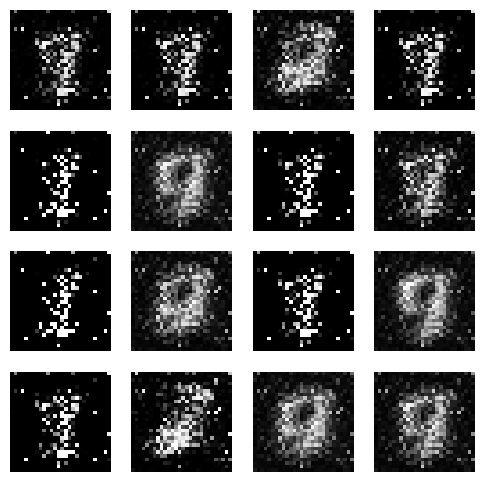

In [ ]:
# Generate new fake images
z = torch.randn(16, 100)  # Generate 16 samples
fake_images = generator(z).detach().numpy()

# Plot generated images
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(fake_images[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()
